# REINFORCE algorithm training analysis and performance

In [1]:
import gymnasium as gym 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import torch
import tensorflow as tf 
import matplotlib.pyplot as plt
import random
import os
import pickle
import timeit
import datetime
from pathlib import Path

2024-10-27 17:25:00.217181: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 17:25:00.485529: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 17:25:00.604251: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-27 17:25:00.639319: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 17:25:00.842422: I tensorflow/core/platform/cpu_feature_guar

In [2]:
Data_path_DQ = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename_DQ = '_20241027_081302'

In [3]:
TrainedRELearning_data = Path('/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data')

errors_file_DQ = Data_path_DQ + 'training_errors' + timename_DQ + '.npz'
rewards_file_DQ = Data_path_DQ + 'rewards' + timename_DQ + '.npy'
episode_length_file_DQ = Data_path_DQ + 'episode_length' + timename_DQ + '.npy'
episode_info_file_DQ = Data_path_DQ + 'episode_info' + timename_DQ + '.pkl'

### Loading data

In [4]:
# Load the numpy arrays
rewards_DQ = np.load(rewards_file_DQ)
episode_lengths_DQ = np.load(episode_length_file_DQ)

# Load the pickle file
with open(episode_info_file_DQ, 'rb') as file:
    episode_info_DQ = pickle.load(file)

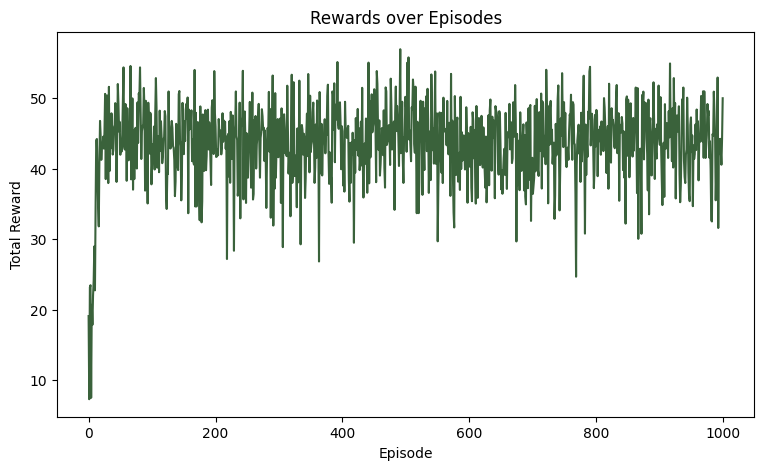

In [5]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_DQ, label='DQN', color='#3a623b')  
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

imagefile = 'rewards' + timename_DQ + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

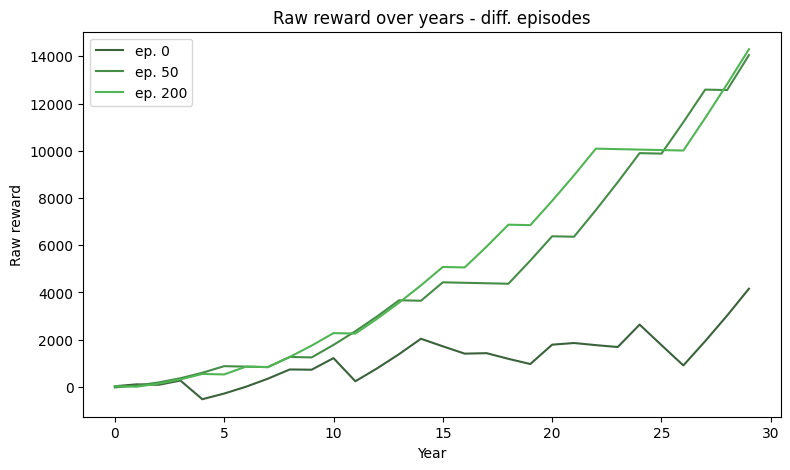

In [9]:
year = episode_info_DQ[0]['year']
raw_reward_0 = episode_info_DQ[0]['raw_reward']
raw_reward_50 = episode_info_DQ[100]['raw_reward']
raw_reward_200 = episode_info_DQ[900]['raw_reward']

plt.figure(figsize=(9, 5))
plt.plot(raw_reward_0, label='ep. 0', color='#3a623b')
plt.plot(raw_reward_50, label='ep. 50', color='#458C47')  
plt.plot(raw_reward_200, label='ep. 200', color='#50B553')  
plt.title('Raw reward over years - diff. episodes')
plt.xlabel('Year')
plt.ylabel('Raw reward')
plt.legend() 


imagefile = 'rewards' + timename_DQ + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### Error Calculation

In [10]:
errors_DQL = np.load(errors_file_DQ)

print(errors_DQL)

NpzFile '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/training_errors_20241027_081302.npz' with keys: step_errors, episode_errors


In [12]:
errors_DQL = np.load(errors_file_DQ)

step_error_DQ = errors_DQL['step_errors']
print("Length of avg_error_RE:", len(step_error_DQ))
ep_errors_DQ = errors_DQL['episode_errors']
print("Length of all_error_RE:", len(ep_errors_DQ))

Length of avg_error_RE: 29969
Length of all_error_RE: 6707


In [17]:
avg_error = ep_errors_DQ[:6000:6]
print(len(avg_error))

1000


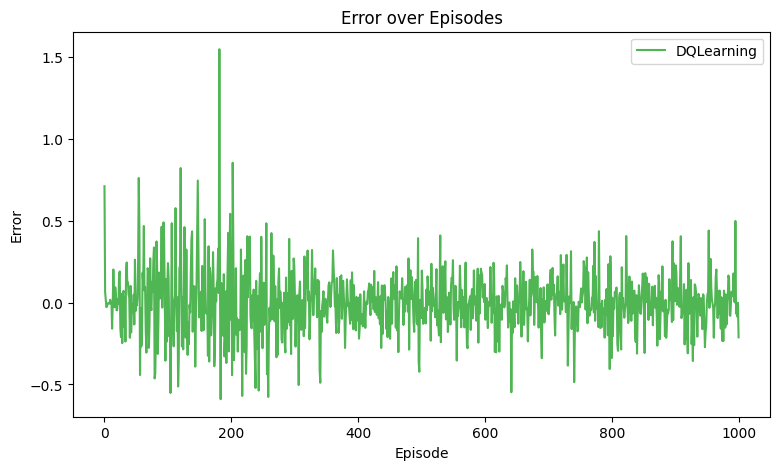

In [18]:
file_name = "REINFORCE_errorrs"

plt.figure(figsize=(9, 5))
plt.plot(avg_error, label='DQLearning', color='#50B553') 
plt.title('Error over Episodes')
plt.xlabel('Episode')
plt.ylabel('Error')
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)

plt.show()